In [1]:
import numpy as np
import pandas as pd

In [2]:
import json

with open('model_df_weiwei_0307_final.json', 'r', encoding='UTF-8') as f:
    WEIWEI = json.load(f)
COL = ['index',
 'name',
 'code',
 'time',
 'price',
 'time_1',
 'price_1',
 'price_dif_1',
 'sell_1',
 'buy_1',
 'volume_1',
 'variation_1',
 'post_num_1',
 'unique_id_1',
 'click_1',
 'like_1',
 'dislike_1',
 'time_2',
 'price_2',
 'price_dif_2',
 'sell_2',
 'buy_2',
 'volume_2',
 'variation_2',
 'post_num_2',
 'unique_id_2',
 'click_2',
 'like_2',
 'dislike_2',
 'time_3',
 'price_3',
 'price_dif_3',
 'sell_3',
 'buy_3',
 'volume_3',
 'variation_3',
 'post_num_3',
 'unique_id_3',
 'click_3',
 'like_3',
 'dislike_3',
 'mkt_cap',
 'kospi',
 'kosdaq',
 'trash',
 'yesterday_closing_price',
 'is_maximum',
 'is_minimum',
 'price_volatility',
 'price_trend',
 'average_price_volatility',
 'sell_minus_buy_1',
 'sell_minus_buy_2',
 'sell_minus_buy_3',
 'is_price_gap_stable',
 'price_gap_volatility',
 'is_like_higher',
 'volume_trend',
 'post_num_trend',
 'unique_id_trend',
 'click_trend',
 'price_increase',
 'did_price_increase',
 'did_price_033',
 'did_price_100',
 'did_price_150',
 'kospi_ind',
 'kosdaq_ind',
 'time_slot',
 'ko_inter',
 'early_mor',
 'morning',
 'lunch',
 'afternoon',
 'late',
 'mkt_change',
 'alpha',
 'per_now',
 'kospi_1',
 'kospi_2',
 'kospi_3',
 'kospi_answer',
 'kosdaq_1',
 'kosdaq_2',
 'kosdaq_3',
 'kosdaq_answer',
 'kospi_trend',
 'kosdaq_trend',
 'kospi_increase',
 'kosdaq_increase',
 'market_increase',
 'did_opening_price_increase',
 'price_1_sq',
 'price_dif_1_sq',
 'sell_1_sq',
 'buy_1_sq',
 'volume_1_sq',
 'variation_1_sq',
 'post_num_1_sq',
 'unique_id_1_sq',
 'click_1_sq',
 'like_1_sq',
 'dislike_1_sq',
 'price_2_sq',
 'price_dif_2_sq',
 'sell_2_sq',
 'buy_2_sq',
 'volume_2_sq',
 'variation_2_sq',
 'post_num_2_sq',
 'unique_id_2_sq',
 'click_2_sq',
 'like_2_sq',
 'dislike_2_sq',
 'price_3_sq',
 'price_dif_3_sq',
 'sell_3_sq',
 'buy_3_sq',
 'volume_3_sq',
 'variation_3_sq',
 'post_num_3_sq',
 'unique_id_3_sq',
 'click_3_sq',
 'like_3_sq',
 'dislike_3_sq',
 'mkt_cap_sq',
 'yesterday_closing_price_sq',
 'price_volatility_sq',
 'price_trend_sq',
 'average_price_volatility_sq',
 'sell_minus_buy_1_sq',
 'sell_minus_buy_2_sq',
 'sell_minus_buy_3_sq',
 'price_gap_volatility_sq',
 'volume_trend_sq',
 'post_num_trend_sq',
 'unique_id_trend_sq',
 'click_trend_sq',
 'kospi_ind_sq',
 'kosdaq_ind_sq',
 'time_slot_sq',
 'ko_inter_sq',
 'mkt_change_sq',
 'alpha_sq',
 'per_now_sq',
 'kospi_1_sq',
 'kospi_2_sq',
 'kospi_3_sq',
 'kosdaq_1_sq',
 'kosdaq_2_sq',
 'kosdaq_3_sq',
 'kospi_trend_sq',
 'kosdaq_trend_sq',
 'KNN',
 'PLS',
 'Logistic',
 'Random Forest',
 'Bagging',
 'Boosting',
 'PCR',
 'Tree']
df = pd.DataFrame(WEIWEI, columns=COL)

In [3]:
'''df["Tree"] = ((df["price_volatility_sq"] > 0.5) & (df["average_price_volatility"] <= 0) \
              & (df["alpha"] <= -1) & (df["variation_2_sq"] <= 200)).astype(float)'''

'df["Tree"] = ((df["price_volatility_sq"] > 0.5) & (df["average_price_volatility"] <= 0)               & (df["alpha"] <= -1) & (df["variation_2_sq"] <= 200)).astype(float)'

In [4]:
testing = df[11629:]

In [5]:
len(testing[testing["KNN"] == 1])

17

In [6]:
len(testing[testing["PLS"] == 1])

1608

In [7]:
len(testing[testing["Logistic"] == 1])

160

In [8]:
len(testing[testing["Random Forest"] == 1])

1347

In [9]:
len(testing[testing["Bagging"] == 1])

835

In [10]:
len(testing[testing["Boosting"] == 1])

670

In [11]:
len(testing[testing["PCR"] == 1])

1258

In [12]:
len(testing[testing["Tree"] == 1])

50

In [13]:
gb = pd.DataFrame(df.groupby("time")[["kospi_answer", "kosdaq_answer"]].mean())

In [14]:
init = gb[0:1]
init = init.set_index([["2018-02-27 12:50"]])
init["kospi_answer"] = 2468.26
init["kosdaq_answer"] = 877.25
gb = pd.concat([init, gb[180:]])

In [15]:
def simulation(VAR):
    
    gb[VAR + "_increase"] = 1 + (df[df[VAR] == 1].groupby("time")["price_increase"].mean())/100
    gb[VAR + "_balance"] = np.nan
    gb[VAR + "_balance"].loc["2018-02-27 12:50"] = 100

    c = 0
    for t, row in gb.iterrows():
        if c > 0:
            if np.isnan(row[VAR + "_increase"]):
                row[VAR + "_balance"] = gb[VAR + "_balance"].iloc[c-1]

            else:

                buying_amount = gb[VAR + "_balance"].iloc[c-1]
                buying_fee = buying_amount * 0.00015

                selling_amount = buying_amount * row[VAR + "_increase"]
                selling_fee = selling_amount * 0.00315

                balance = selling_amount - buying_fee - selling_fee

                row[VAR + "_balance"] = balance
        c += 1

In [16]:
method = ['KNN', 'PLS', 'Logistic', 'Random Forest', 'Bagging', 'Boosting', 'PCR', 'Tree']

for m in method:
    simulation(m)

In [17]:
gb["KOSPI_balance"] = 100 * gb["kospi_answer"] / gb["kospi_answer"].iloc[0]
gb["KOSDAQ_balance"] = 100 * gb["kosdaq_answer"] / gb["kosdaq_answer"].iloc[0]

gb["KOSPI_balance"].iloc[len(gb) - 1] = gb["KOSPI_balance"].iloc[len(gb) - 1] * (1-0.00315) - 0.015
gb["KOSDAQ_balance"].iloc[len(gb) - 1] = gb["KOSDAQ_balance"].iloc[len(gb) - 1] * (1-0.00315) - 0.015

In [18]:
result = gb[["KOSPI_balance", "KOSDAQ_balance", "KNN_balance", "PLS_balance",\
             "Logistic_balance", "Random Forest_balance", "Bagging_balance",\
             "Boosting_balance", "PCR_balance", "Tree_balance"]]
result = result.reset_index()

In [19]:
result

,index,KOSPI_balance,KOSDAQ_balance,KNN_balance,PLS_balance,Logistic_balance,Random Forest_balance,Bagging_balance,Boosting_balance,PCR_balance,Tree_balance
0,2018-02-27 12:50,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,2018-02-27 13:50,99.901145,99.856369,99.046319,99.252621,99.333041,99.688154,99.554364,100.000000,100.000000,99.362330
2,2018-02-27 14:00,99.902766,99.851810,99.046319,98.903868,99.116662,99.606547,99.449171,100.000000,99.590048,99.362330
3,2018-02-27 14:10,99.829435,99.875748,99.046319,98.273103,99.083590,99.907982,98.423711,100.000000,97.695457,99.095534
4,2018-02-27 14:20,99.828624,99.878028,99.448133,97.497190,98.788354,99.636939,98.126163,99.390379,94.317854,98.676155
5,2018-02-27 14:30,99.692091,99.900826,99.448133,95.422943,98.162454,99.263467,98.054452,99.390379,90.075001,98.676155
6,2018-02-27 14:40,99.696142,99.815332,99.448133,94.024036,97.445843,98.751045,97.699561,99.390379,86.105802,98.676155
7,2018-02-27 14:50,99.769473,99.867769,99.448133,93.745082,96.978016,98.620566,97.358099,99.390379,85.703573,98.676155
8,2018-02-27 15:00,99.752457,99.879168,99.448133,93.274576,96.581499,98.488836,96.973300,99.390379,85.173152,99.322033
9,2018-02-27 15:10,99.808772,99.855229,99.448133,93.098578,96.497835,98.835395,96.434269,99.390379,85.143193,99.322033


In [20]:
lst = list(result.columns)
print(lst)

['index', 'KOSPI_balance', 'KOSDAQ_balance', 'KNN_balance', 'PLS_balance', 'Logistic_balance', 'Random Forest_balance', 'Bagging_balance', 'Boosting_balance', 'PCR_balance', 'Tree_balance']


In [21]:
#result.to_json('balance_Feb27_Mar07_final.json', orient='values')

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


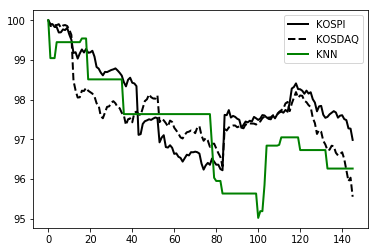

In [23]:
# KNN

df=pd.DataFrame({'x': range(0,146), 'y1': result["KOSPI_balance"], 'y2': result["KOSDAQ_balance"],\
                'y3': result["KNN_balance"]})
 
plt.plot( 'x', 'y1', data=df, marker='', color='black', linewidth=2, linestyle='solid', label="KOSPI")
plt.plot( 'x', 'y2', data=df, marker='', color='black', linewidth=2, linestyle='dashed', label="KOSDAQ")
plt.plot( 'x', 'y3', data=df, marker='', color='green', linewidth=2, linestyle='solid', label="KNN")
plt.legend()
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


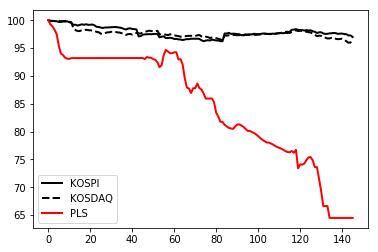

In [24]:
# PLS

df=pd.DataFrame({'x': range(0,146), 'y1': result["KOSPI_balance"], 'y2': result["KOSDAQ_balance"],\
                'y3': result["PLS_balance"]})
 
plt.plot( 'x', 'y1', data=df, marker='', color='black', linewidth=2, linestyle='solid', label="KOSPI")
plt.plot( 'x', 'y2', data=df, marker='', color='black', linewidth=2, linestyle='dashed', label="KOSDAQ")
plt.plot( 'x', 'y3', data=df, marker='', color='red', linewidth=2, linestyle='solid', label="PLS")
plt.legend()
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


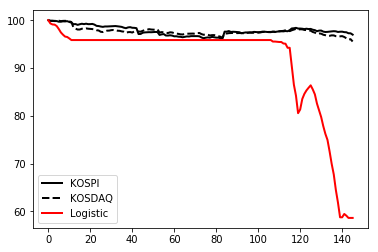

In [25]:
# Logistic

df=pd.DataFrame({'x': range(0,146), 'y1': result["KOSPI_balance"], 'y2': result["KOSDAQ_balance"],\
                'y3': result["Logistic_balance"]})
 
plt.plot( 'x', 'y1', data=df, marker='', color='black', linewidth=2, linestyle='solid', label="KOSPI")
plt.plot( 'x', 'y2', data=df, marker='', color='black', linewidth=2, linestyle='dashed', label="KOSDAQ")
plt.plot( 'x', 'y3', data=df, marker='', color='red', linewidth=2, linestyle='solid', label="Logistic")
plt.legend()
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


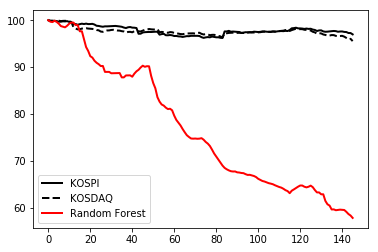

In [26]:
# Random Forest

df=pd.DataFrame({'x': range(0,146), 'y1': result["KOSPI_balance"], 'y2': result["KOSDAQ_balance"],\
                'y3': result["Random Forest_balance"]})
 
plt.plot( 'x', 'y1', data=df, marker='', color='black', linewidth=2, linestyle='solid', label="KOSPI")
plt.plot( 'x', 'y2', data=df, marker='', color='black', linewidth=2, linestyle='dashed', label="KOSDAQ")
plt.plot( 'x', 'y3', data=df, marker='', color='red', linewidth=2, linestyle='solid', label="Random Forest")
plt.legend()
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


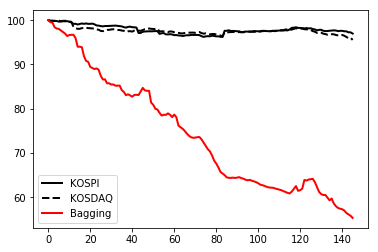

In [27]:
# Bagging

df=pd.DataFrame({'x': range(0,146), 'y1': result["KOSPI_balance"], 'y2': result["KOSDAQ_balance"],\
                'y3': result["Bagging_balance"]})
 
plt.plot( 'x', 'y1', data=df, marker='', color='black', linewidth=2, linestyle='solid', label="KOSPI")
plt.plot( 'x', 'y2', data=df, marker='', color='black', linewidth=2, linestyle='dashed', label="KOSDAQ")
plt.plot( 'x', 'y3', data=df, marker='', color='red', linewidth=2, linestyle='solid', label="Bagging")
plt.legend()
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


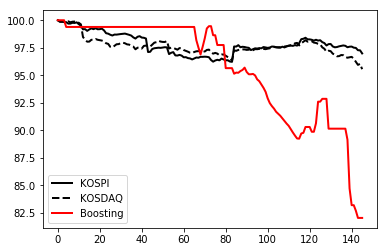

In [28]:
# Boosting

df=pd.DataFrame({'x': range(0,146), 'y1': result["KOSPI_balance"], 'y2': result["KOSDAQ_balance"],\
                'y3': result["Boosting_balance"]})
 
plt.plot( 'x', 'y1', data=df, marker='', color='black', linewidth=2, linestyle='solid', label="KOSPI")
plt.plot( 'x', 'y2', data=df, marker='', color='black', linewidth=2, linestyle='dashed', label="KOSDAQ")
plt.plot( 'x', 'y3', data=df, marker='', color='red', linewidth=2, linestyle='solid', label="Boosting")
plt.legend()
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


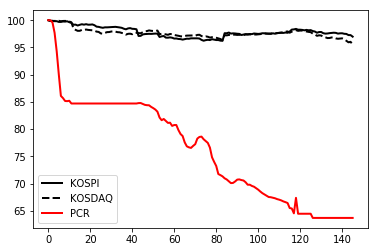

In [29]:
# PCR

df=pd.DataFrame({'x': range(0,146), 'y1': result["KOSPI_balance"], 'y2': result["KOSDAQ_balance"],\
                'y3': result["PCR_balance"]})
 
plt.plot( 'x', 'y1', data=df, marker='', color='black', linewidth=2, linestyle='solid', label="KOSPI")
plt.plot( 'x', 'y2', data=df, marker='', color='black', linewidth=2, linestyle='dashed', label="KOSDAQ")
plt.plot( 'x', 'y3', data=df, marker='', color='red', linewidth=2, linestyle='solid', label="PCR")
plt.legend()
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


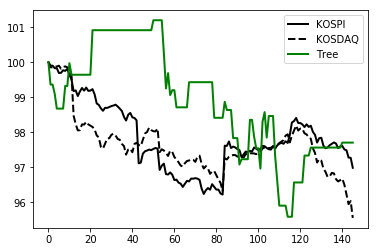

In [30]:
# Tree

df=pd.DataFrame({'x': range(0,146), 'y1': result["KOSPI_balance"], 'y2': result["KOSDAQ_balance"],\
                'y3': result["Tree_balance"]})
 
plt.plot( 'x', 'y1', data=df, marker='', color='black', linewidth=2, linestyle='solid', label="KOSPI")
plt.plot( 'x', 'y2', data=df, marker='', color='black', linewidth=2, linestyle='dashed', label="KOSDAQ")
plt.plot( 'x', 'y3', data=df, marker='', color='green', linewidth=2, linestyle='solid', label="Tree")
plt.legend()
plt.show()